# Setup

In [1]:
import ROOT as rt
import root_numpy as rtnp
import numpy as np
import matplotlib.pyplot as plt
from histo_utilities import create_TH1D, create_TH2D, std_color_list, SetMaxToMaxHist, make_ratio_plot
from cebefo_style import Set_2D_colz_graphics

import CMS_lumi, tdrstyle
tdrstyle.setTDRStyle()
CMS_lumi.writeExtraText = 1
CMS_lumi.extraText = "     Simulation Preliminary"

donotdelete = []

Welcome to JupyROOT 6.12/06


In [2]:
fpath = {}
tree = {}
process = {}
process_short = {}

fpath['SoftQCD'] = '../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_SoftQCD_PTFilter5_0p0-evtgen_HQET2_central_NoPU_10-2-3_v0/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_SoftQCD_PTFilter5_0p0-evtgen_HQET2_central_BPHMCEasyRECO_merged_1-500.root'
process['SoftQCD'] = 'Soft QCD: B_{0} #rightarrow D*^{-}#mu^{+}#nu'
process_short['SoftQCD'] = 'Soft QCD'

fpath['hardbbar_5'] = '../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTHat5p0-evtgen_HQET2_central_NoPU_10-2-3_v0/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTHat5p0-evtgen_HQET2_central_BPHMCEasyRECO_merged_1-500.root'
process['hardbbar_5'] = 'Hard b#bar{b}, #hat{p}_{T} > 5 GeV: B_{0} #rightarrow D*^{-}#mu^{+}#nu'
process_short['hardbbar_5'] = 'Hard b#bar{b}, #hat{p}_{T} > 5 GeV'

fpath['hardbbar_3'] = '../data/cmsMC_private/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTHat3p0-evtgen_HQET2_central_NoPU_10-2-3_v0/BPH_Tag-B0_MuNuDmst-pD0bar-kp_13TeV-pythia8_Hardbbbar_PTHat3p0-evtgen_HQET2_central_BPHMCEasyRECO_1.root'
process['hardbbar_3'] = 'Hard b#bar{b}, #hat{p}_{T} > 3 GeV: B_{0} #rightarrow D*^{-}#mu^{+}#nu'
process_short['hardbbar_3'] = 'Hard b#bar{b}, #hat{p}_{T} > 3 GeV'

for k,v in fpath.iteritems():
    tree[k] = rtnp.root2array(v)

In [3]:
fields_name = None
for k in tree.keys():
    print k
    aux_fields_name = np.sort([x[1:-8] for x in str(tree[k].dtype)[2:-2].split('), (')])
    if fields_name is None:
        fields_name = aux_fields_name
    else:
        for x1, x2 in zip(fields_name, aux_fields_name):
            if x1 != x2:
                print 'Tree version not compatible', k, 'with', tree.keys()[0]
                print x1, x2
                break

print fields_name

hardbbar_5
SoftQCD
hardbbar_3
['BPH_NTrgObj' 'BPH_TrgObJ_matched' 'B_RECO_eta' 'B_RECO_pdgId'
 'B_RECO_phi' 'B_RECO_pt' 'B_eta' 'B_p' 'B_p_dl' 'B_pt' 'B_pz' 'B_tau'
 'D0_RECO_eta' 'D0_RECO_pdgId' 'D0_RECO_phi' 'D0_RECO_pt' 'D_pt_MC'
 'D_pthat_MC' 'Dst_RECO_eta' 'Dst_RECO_pdgId' 'Dst_RECO_phi' 'Dst_RECO_pt'
 'Est_mu_RECO' 'KReco_Nchi2' 'KReco_Nhits' 'KReco_chi2' 'KReco_dxy'
 'KReco_dxyError' 'KReco_dz' 'KReco_dzError' 'KReco_eta' 'KReco_ndof'
 'KReco_pdgId' 'KReco_phi' 'KReco_pt' 'K_RecoMC_dR' 'K_RecoMC_dpt' 'K_eta'
 'K_pdgId' 'K_phi' 'K_pt' 'M2_miss_RECO' 'M_ext_MC' 'M_miss_MC' 'M_vis_MC'
 'M_vis_RECO' 'N_neutral' 'dTheta_visB_MC' 'dl' 'muReco_Nchi2'
 'muReco_Nhits' 'muReco_chi2' 'muReco_dxy' 'muReco_dxyError' 'muReco_dz'
 'muReco_dzError' 'muReco_eta' 'muReco_isCaloMuon' 'muReco_isGlobalMuon'
 'muReco_isLooseMuon' 'muReco_isMediumMuon' 'muReco_isMuon'
 'muReco_isSoftMuon' 'muReco_isStandAloneMuon' 'muReco_isTightMuon'
 'muReco_isTrackerMuon' 'muReco_ndof' 'muReco_pdgId' 'muReco_phi'
 

# Overall functions

## Plots

In [4]:
def dr_dpt_plot(dpt, dr, cut = [None, None]):
    c = rt.TCanvas('c', 'c',50,50,800,600)
    c.SetTickx(0)
    c.SetTicky(0)
    x = dpt
    y = dr
    xbin = np.logspace(-7,2,100)
    ybin = np.logspace(-7,1,100)
    h2 = create_TH2D(np.column_stack((x,y)), title='', axis_title=['#left|1 - p_{T}^{RECO}/p_{T}^{MC}#right|', '#DeltaR' , ''], binning=[xbin, ybin])

    h2.Draw('colz')
    h2.GetXaxis().SetTitleOffset(1.3)
    
    ln = rt.TLine()
    ln.SetLineColor(6)
    ln.SetLineStyle(9)
    ln.SetLineWidth(2)
    if (not cut[0] is None) and (not cut[1] is None):
        ln.DrawLine(cut[0], cut[1], cut[0], ybin[0])
        ln.DrawLine(cut[0], cut[1], xbin[0], cut[1])
    
    c.SetLogy()
    c.SetLogx()
    CMS_lumi.CMS_lumi(c, -1, 0)
    rt.gPad.SetBottomMargin(0.18)
    rt.gPad.SetRightMargin(0.12)
    c.hist = [h2]
    c.Draw()
    return c

In [5]:
def drawOnCMSCanvas(hl, opt='same', label=''):
    c = rt.TCanvas('c'+label, 'c'+label,50,50,800,600)
    c.SetTickx(0)
    c.SetTicky(0)
    
    for i, o in enumerate(hl):
        do = ''
        if opt == 'same':
            if i > 0:
                do = 'SAME'
        elif not opt is None:
            do = opt[i]
            
        o.Draw(do)
        
    
    CMS_lumi.CMS_lumi(c, -1, 0)
    c.objs = [hl]
    c.Draw()
    return c

# Muon

## Trigger

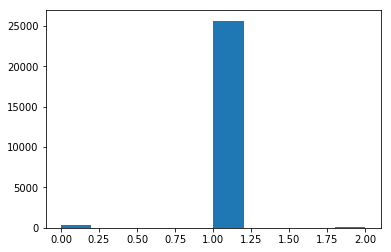

In [6]:
out = plt.hist(tree['SoftQCD']['BPH_TrgObJ_matched'])

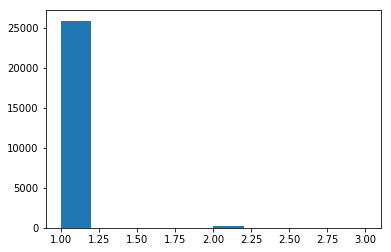

In [7]:
out = plt.hist(tree['SoftQCD']['BPH_NTrgObj'])

## Muon matching

Distance between the Gen $\mu$ from B decay and best matching PFCand

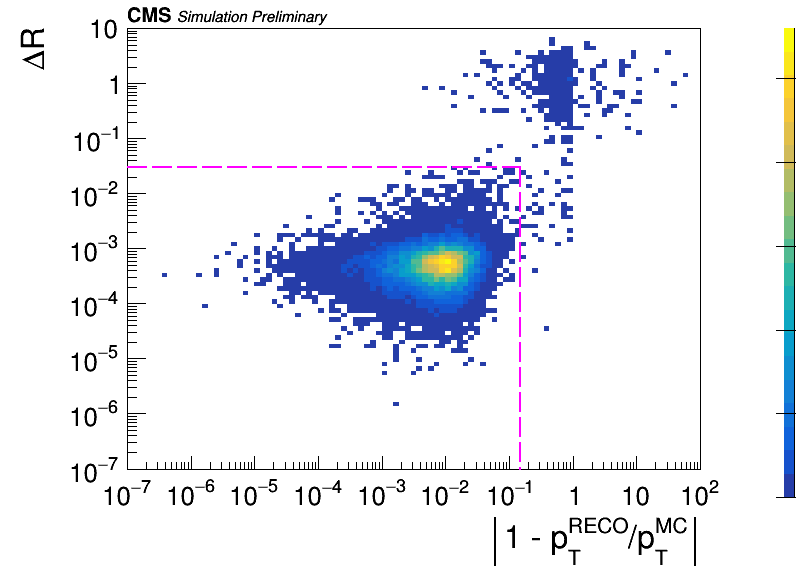

In [8]:
n='SoftQCD'
c = dr_dpt_plot(np.abs(tree[n]['mu_RecoMC_dpt']) , tree[n]['mu_RecoMC_dR'], [0.15, 0.03])

Distance between the B muon and muon which triggered the event

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: h (Potential memory leak).


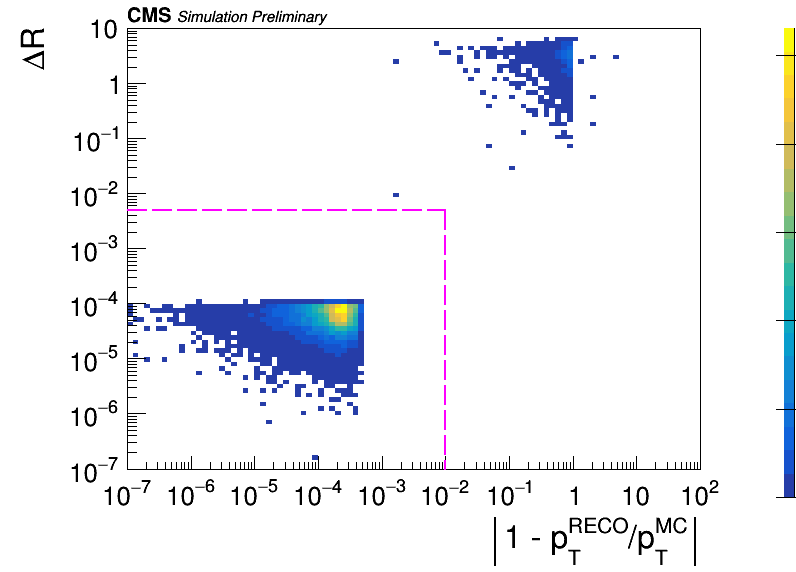

In [9]:
t = tree['SoftQCD']
muRECO_sel  = np.logical_and(np.abs(t['mu_RecoMC_dpt']) < 0.15 , t['mu_RecoMC_dR'] < 0.03)
trgObgMatched_sel = t['BPH_TrgObJ_matched'] > 0
sel = np.logical_and(muRECO_sel, trgObgMatched_sel)

dpt = np.abs(1 - t['muReco_pt']/t['trgMu_pt'])
dR = np.hypot(t['muReco_phi']-t['trgMu_phi'], t['muReco_eta']-t['trgMu_eta'])
c = dr_dpt_plot(dpt[sel] , dR[sel], [0.01, 0.005])

muB_trg_sel = np.logical_and(dpt < 0.01, dR < 0.005)

In [10]:
mu_sel = {}
for k, t in tree.iteritems():
    muRECO_sel  = np.logical_and(np.abs(t['mu_RecoMC_dpt']) < 0.15 , t['mu_RecoMC_dR'] < 0.03)
    sel = np.logical_and(muRECO_sel, t['BPH_TrgObJ_matched'] > 0)
    
    dpt = np.abs(1 - t['muReco_pt']/t['trgMu_pt'])
    dR = np.hypot(t['muReco_phi']-t['trgMu_phi'], t['muReco_eta']-t['trgMu_eta'])
    muB_trg_sel = np.logical_and(dpt < 0.01, dR < 0.005)
    
    mu_sel[k] = np.logical_and(sel, muB_trg_sel)

# Event variables

In [11]:
vars_list = {'muReco_pt':'Muon p_{T} [GeV]', 
             'q2_MC':'q^{2}_{MC} [GeV]',
             'B_pt':'B^{0} p_{T}^{MC} [GeV]',
             'Est_mu_RECO':'E*_{#mu} RECO'
            }
binning_list = {'muReco_pt':np.logspace(0,np.log10(50),30), 
                'q2_MC':[20,0,16],
                'B_pt':np.logspace(0,2,30),
                'Est_mu_RECO':[20,0,4]
               }

Info in <TCanvas::Print>: png file ../fig/1903_1/MCProdRatio_B_pt.png has been created
Info in <TCanvas::Print>: png file ../fig/1903_1/MCProdRatio_Est_mu_RECO.png has been created
Info in <TCanvas::Print>: png file ../fig/1903_1/MCProdRatio_q2_MC.png has been created
Info in <TCanvas::Print>: png file ../fig/1903_1/MCProdRatio_muReco_pt.png has been created


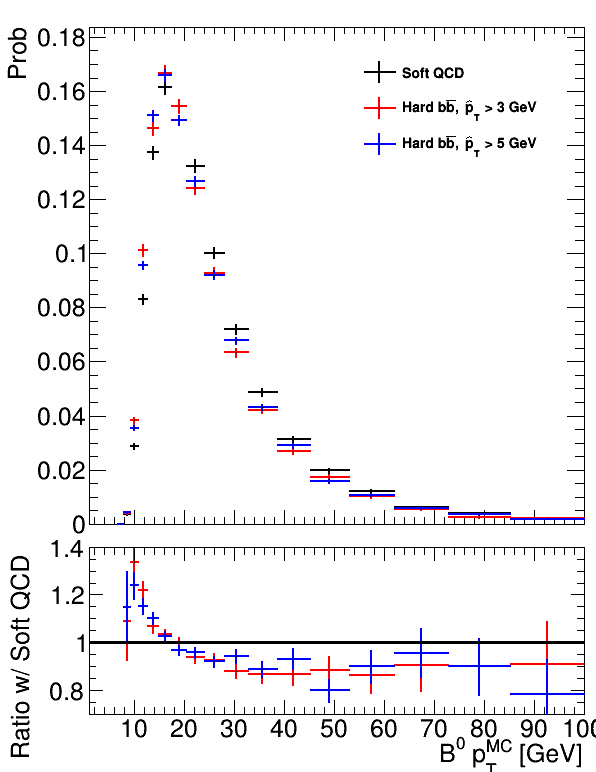

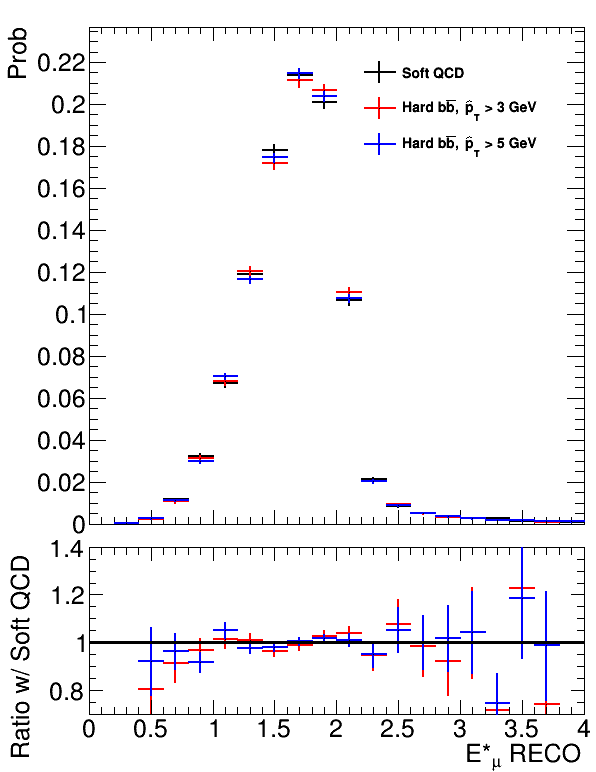

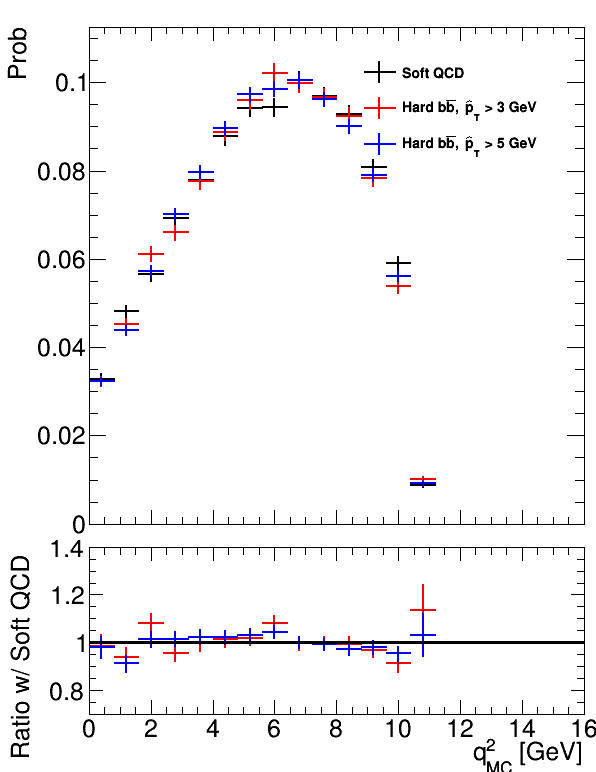

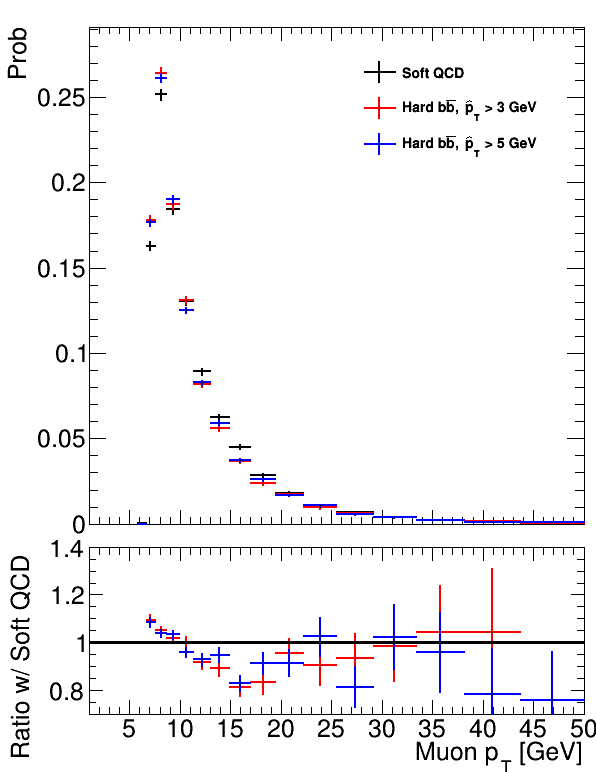

In [12]:
c_list = []
for v, label in vars_list.iteritems():
    h_l = []
    leg = rt.TLegend(0.75,0.7,0.98,0.92, 'B#rightarrowD*#mu#nu')
    for ik, k in enumerate(np.sort(tree.keys())):
        #pay attention to put the right sel
        h = create_TH1D(tree[k][v][mu_sel[k]], 'h_'+k+v, process_short[k], 
                        axis_title=[label, 'Prob'], 
                        binning=binning_list[v])
        h.Scale(1./h.GetEntries())
        h.SetLineColor(std_color_list[ik])
        leg.AddEntry(h, process_short[k], 'le')
        h_l.append(h)
    
    SetMaxToMaxHist(h_l)
#     c_list.append(drawOnCMSCanvas(h_l+[leg], 'same', v))
    c = make_ratio_plot(h_l, label=v, draw_opt='E', ratio_bounds=[0.7,1.4])
    c.Draw()
    c_list.append(c)
    c.SaveAs('../fig/1903_1/MCProdRatio_{}.png'.format(v))